In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from readability import Readability
import textstat
sns.set(style="darkgrid")

In [2]:
dfHardware = pd.read_json('reviews_Tools_and_Home_Improvement_5.json.gz', lines=True, compression='infer')
dfHardware["category"] = "Hardware" 
dfBeauty = pd.read_json('reviews_Beauty_5.json.gz', lines=True, compression='infer')
dfBeauty["category"] = "Beauty" 
frames = [dfHardware, dfBeauty]
df = pd.concat(frames)

In [3]:
df.head()

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime,category
0,A4IL0CLL27Q33,104800001X,D. Brennan,"[0, 1]","I hate it when my shirt collars, not otherwise...",5,Perfect for collar stay management,1390953600,"01 29, 2014",Hardware
1,A3Q5W5E7TDVLJF,104800001X,funnyc130,"[0, 0]",These little magnets are really powerful for t...,5,Neat,1369958400,"05 31, 2013",Hardware
2,A37KNOJXE2FU6,104800001X,Joseph Yonke II,"[0, 0]",I wanted something this small to mount on the ...,5,Very small and thin,1363132800,"03 13, 2013",Hardware
3,A3U4AFML9SZPWK,104800001X,"Leith Tussing ""I like tacos.""","[0, 0]",I use these to magnetize my Warhammer 40K mini...,5,Excellent hobby magnets,1371340800,"06 16, 2013",Hardware
4,A36Y7X194VWVKA,104800001X,Mark D.,"[23, 25]",They are soo freaking annoying!! Why?! You sp...,5,They're annoying... which is why they get five...,1376006400,"08 9, 2013",Hardware


In [4]:
df.tail()

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime,category
198497,A2BLFCOPSMBOZ9,B00LLPT4HI,Dave Edmiston,"[0, 0]",Just a little dab of this shea butter should b...,5,A little dab...,1405468800,"07 16, 2014",Beauty
198498,A1UQBFCERIP7VJ,B00LLPT4HI,Margaret Picky,"[0, 0]",This shea butter is completely raw and unrefin...,5,Pure organic raw shea butter,1405296000,"07 14, 2014",Beauty
198499,A35Q0RBM3YNQNF,B00LLPT4HI,M. Hill,"[0, 0]",The skin is the body's largest organ and it ab...,5,One Pound Organic Grade A Unrefined Shea Butter,1405468800,"07 16, 2014",Beauty
198500,A3LGT6UZL99IW1,B00LLPT4HI,"Richard C. Drew ""Anaal Nathra/Uthe vas Bethod...","[0, 0]",I have very dry elbows and knees. I have a to...,5,This stuff is amazing!,1405382400,"07 15, 2014",Beauty
198501,A3UJRNI8UR4871,B00LLPT4HI,"Wulfstan ""wulfstan""","[0, 1]",This is 100% pure Shea Butter. Do not mistake ...,5,"The ""Real Stuff""!",1405987200,"07 22, 2014",Beauty


In [5]:
len(df)

332978

In [6]:
df["total_votes"] = df.helpful.str[1]
df["helpful_votes"] = df.helpful.str[0]
df["helpfulness"] = df.helpful.str[0] / df.helpful.str[1]
df.drop(columns=["helpful"], inplace=True)
df=df[df.total_votes >= 5]

df.reset_index(drop=True, inplace=True)
df.head()

,reviewerID,asin,reviewerName,reviewText,overall,summary,unixReviewTime,reviewTime,category,total_votes,helpful_votes,helpfulness
0,A36Y7X194VWVKA,104800001X,Mark D.,They are soo freaking annoying!! Why?! You sp...,5,They're annoying... which is why they get five...,1376006400,"08 9, 2013",Hardware,25,23,0.920000
1,A2GD2HORAJHBK5,104800001X,smiley,"am using for 40k models, they are a great size...",5,using for 40k,1361145600,"02 18, 2013",Hardware,7,6,0.857143
2,A7KVMEIDJP0JK,1558706879,Arthur Held,The color pictures and exploded diagrams are a...,5,Great source book for those new to building w/...,1085702400,"05 28, 2004",Hardware,44,42,0.954545
3,A1C8O2EUVPZJUO,1558706879,Kevin L. Cradic,This has nice projects even someone just start...,4,Just buy a Kreg Jig? This is the book for you!,1200700800,"01 19, 2008",Hardware,28,28,1.000000
4,A2H2IP8SLZ3XQ7,1558706879,Michael Lamirata,Thought this book would be chock full of great...,2,Projects just aren't appealing. Good Info for...,1358121600,"01 14, 2013",Hardware,10,7,0.700000


In [7]:
len(df)

38215

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38215 entries, 0 to 38214
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   reviewerID      38215 non-null  object 
 1   asin            38215 non-null  object 
 2   reviewerName    38131 non-null  object 
 3   reviewText      38215 non-null  object 
 4   overall         38215 non-null  int64  
 5   summary         38215 non-null  object 
 6   unixReviewTime  38215 non-null  int64  
 7   reviewTime      38215 non-null  object 
 8   category        38215 non-null  object 
 9   total_votes     38215 non-null  int64  
 10  helpful_votes   38215 non-null  int64  
 11  helpfulness     38215 non-null  float64
dtypes: float64(1), int64(4), object(7)
memory usage: 3.5+ MB


In [9]:
df.total_votes.describe()

count    38215.000000
mean        18.708701
std         44.730526
min          5.000000
25%          6.000000
50%          9.000000
75%         17.000000
max       3643.000000
Name: total_votes, dtype: float64

Text(0, 0.5, 'Helpfulness')

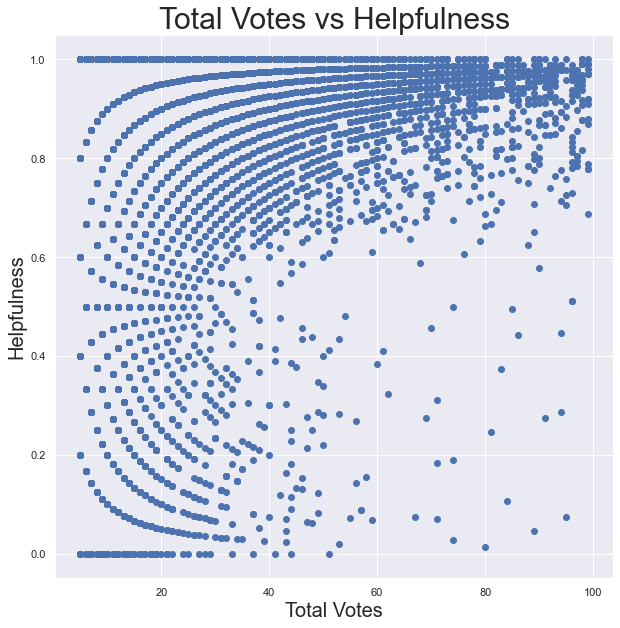

In [10]:
cropped = df[df.total_votes < 100]
fig, axc = plt.subplots(figsize=(10, 10))
axc.scatter(cropped.total_votes, cropped.helpfulness)
axc.set_title('Total Votes vs Helpfulness', fontsize= 30)
axc.set_xlabel('Total Votes', fontsize= 20)
axc.set_ylabel('Helpfulness', fontsize= 20)

Text(0, 0.5, 'Helpfulness')

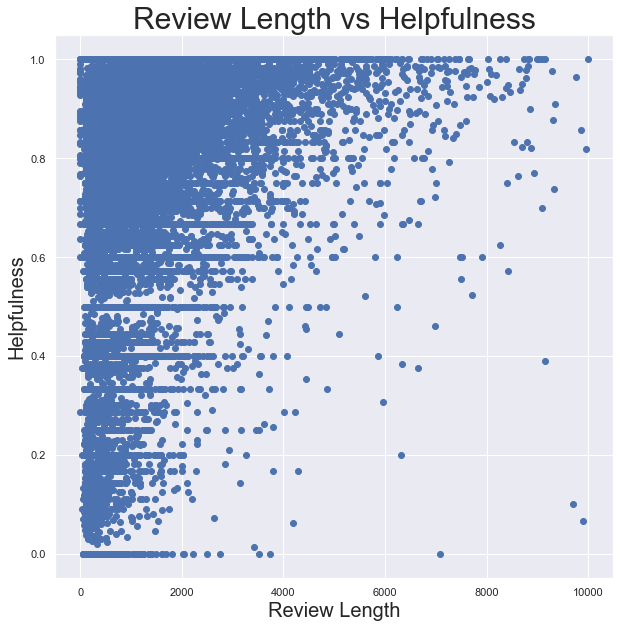

In [11]:
df['textLength'] = [len(df.loc[row, 'reviewText']) for row in df.index]
cropped = df[df.textLength < 10000]
fig, ax = plt.subplots(figsize=(10, 10))
ax.scatter(cropped.textLength, cropped.helpfulness)
ax.set_title('Review Length vs Helpfulness', fontsize= 30)
ax.set_xlabel('Review Length', fontsize= 20)
ax.set_ylabel('Helpfulness', fontsize= 20)

In [12]:
# df['readability'] = [textstat.text_standard(df.loc[row, 'reviewText'], float_output=True) for row in df.index]
# fig, ax = plt.subplots(figsize=(10, 10))
# ax.scatter(df.readability, df.helpfulness)
# ax.set_title('Helpfulness vs Readability', fontsize= 30)
# ax.set_xlabel('Helpfulness', fontsize= 20)
# ax.set_ylabel('Readability', fontsize= 20)

# s = df.sort_values(by=['readability'])
# c = s[s.readability < 500]
# fig, ax = plt.subplots(figsize=(10, 10))
# ax.scatter(c.readability, c.helpfulness)

In [13]:
df["helpful"] = np.where(df["helpfulness"] > .86, 1, 0) 
df.head()

,reviewerID,asin,reviewerName,reviewText,overall,summary,unixReviewTime,reviewTime,category,total_votes,helpful_votes,helpfulness,textLength,helpful
0,A36Y7X194VWVKA,104800001X,Mark D.,They are soo freaking annoying!! Why?! You sp...,5,They're annoying... which is why they get five...,1376006400,"08 9, 2013",Hardware,25,23,0.920000,500,1
1,A2GD2HORAJHBK5,104800001X,smiley,"am using for 40k models, they are a great size...",5,using for 40k,1361145600,"02 18, 2013",Hardware,7,6,0.857143,602,0
2,A7KVMEIDJP0JK,1558706879,Arthur Held,The color pictures and exploded diagrams are a...,5,Great source book for those new to building w/...,1085702400,"05 28, 2004",Hardware,44,42,0.954545,212,1
3,A1C8O2EUVPZJUO,1558706879,Kevin L. Cradic,This has nice projects even someone just start...,4,Just buy a Kreg Jig? This is the book for you!,1200700800,"01 19, 2008",Hardware,28,28,1.000000,318,1
4,A2H2IP8SLZ3XQ7,1558706879,Michael Lamirata,Thought this book would be chock full of great...,2,Projects just aren't appealing. Good Info for...,1358121600,"01 14, 2013",Hardware,10,7,0.700000,285,0


In [14]:
df.helpful.value_counts(normalize=True)

0    0.502185
1    0.497815
Name: helpful, dtype: float64

In [15]:
from sklearn.model_selection import train_test_split

train_size = round(0.8 * len(df))
test_size = round(0.1 * len(df))
val_size = round(0.1 * len(df))

x = df['reviewText']
y = df['helpful']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = test_size, random_state = 123)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size = val_size, random_state=123)

print(y_train.value_counts(normalize=True))
print(y_val.value_counts(normalize=True))
print(y_test.value_counts(normalize=True))

0    0.501292
1    0.498708
Name: helpful, dtype: float64
0    0.504186
1    0.495814
Name: helpful, dtype: float64
0    0.507326
1    0.492674
Name: helpful, dtype: float64


In [16]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
import string

stop_list = stopwords.words('english')
stop_list += list(string.punctuation)
stop_list += ['br', '.<', '..', '...', '``', "''", '--']

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Ed\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [17]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier

pipe_bigram_rf = Pipeline([('vectorizer', CountVectorizer(analyzer='word', 
                                                          ngram_range=(2, 2), 
                                                          stop_words=stop_list, 
                                                          max_features=100)),
                        ('forest', RandomForestClassifier(n_estimators=100,
                                                          n_jobs=-1))])

pipe_bigram_rf.fit(x_train, y_train)

Pipeline(steps=[('vectorizer',
                 CountVectorizer(max_features=100, ngram_range=(2, 2),
                                 stop_words=['i', 'me', 'my', 'myself', 'we',
                                             'our', 'ours', 'ourselves', 'you',
                                             "you're", "you've", "you'll",
                                             "you'd", 'your', 'yours',
                                             'yourself', 'yourselves', 'he',
                                             'him', 'his', 'himself', 'she',
                                             "she's", 'her', 'hers', 'herself',
                                             'it', "it's", 'its', 'itself', ...])),
                ('forest', RandomForestClassifier(n_jobs=-1))])

In [18]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

y_pred_train = pipe_bigram_rf.predict(x_train)
print('Training accuracy:', accuracy_score(y_train, y_pred_train))

Training accuracy: 0.694841516469857


In [19]:
# Validate
y_pred_val = pipe_bigram_rf.predict(x_val)
print('Validation accuracy:', accuracy_score(y_val, y_pred_val))

Validation accuracy: 0.5607012035583464


In [20]:
# View additional metrics
print(classification_report(y_val, y_pred_val))

              precision    recall  f1-score   support

           0       0.55      0.71      0.62      1927
           1       0.58      0.41      0.48      1895

    accuracy                           0.56      3822
   macro avg       0.57      0.56      0.55      3822
weighted avg       0.57      0.56      0.55      3822

